In [1]:
import tensorflow as tf
data = tf.keras.datasets.fashion_mnist

(training_images, training_labels), (test_images, test_labels) = data.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


# Dataset Fashion MNIST que foi utilizado no projeto

## Características:
### - 70k imagens (60k treino, 10k teste)
### - 10 classes de roupas/calçados (28x28 pixels, tons de cinza)
### - Mais desafiador que MNIST tradicional

## Como carregar:
from tensorflow.keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

## Classes:
class_names = ['Camiseta', 'Calça', 'Pullover', 'Vestido', 'Casaco',
               'Sandália', 'Camisa', 'Tênis', 'Bolsa', 'Bota']


## Ideal para:
### - Testar modelos de classificação
### - Aprender CNNs
### - Benchmark rápido

In [9]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.97):
      print("\nReached 97% accuracy so cancelling training!")
      self.model.stop_training = True

##Classe Mycallback
###Oque é callbacks?
"callback é um conjunto de funções que são aplicadas em determinadas horas do treinamento, võce pode usar callbacks para obter uma visão sobre estados internos e estatísticas do modelo durante o treinamento" ---- Documentação do Keras

Em resumo voce usa callback para ter controle sobre o proceso, neste caso usamos para parar o treinamento ao atingir certa acurácia(tambem podemos usar para atingir certa perda/loss).

Pode ser utilizado para:
- "EarlyStopping" --> evita overfitting parando o treinamento antecipado
-  "ModelCheckpoint" --> salva o modelo após cada epoch
-  "LearningRateScheduler" --> ajusta taxa de aprendizado conforme uma função pré-definida

Elemento imprescindível para um bo modelo de ML



--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [3]:
training_images = training_images.reshape(60000,28,28,1)
test_images = test_images.reshape(10000,28,28,1)

As imagens do conjunto de dados Mnist_Fashion seguem o seguinte formato/shape(para o conjunto de treino):

60000,28,28 sendo:

60000 -->batch_size(tamanho do conjunto de dados de treinamento)

28 -->height (altura da imagem pixels)

28  -->width (largura da imagem em pixels)

Entretanto as CNNs esperam Tensores 4D(Lotes, Altura, Largura, Canais).
As redes neurais convolucionais(CNNS) são projetadas para processar imagens com **canais de cor**(ex:RGB = 3 canais, escala de cinza = 1 canal). Portanto o formato esperado é:

-  (batch_size, height, width, channels)

Portanto o passo de reshape da imagem é muito importante para a CNN aceitar os dados de treinamento e de teste como input, seguinte esse passo:

- training_images = training_images.reshape(60000,28,28,1)
- test_images = test_images.reshape(10000,28,28,1)

Os dados de treino e de teste são alterados para o shape/formato que a CNN aceita, especificando que há 1 canal de cor(imagem em tons de cinza)

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


9


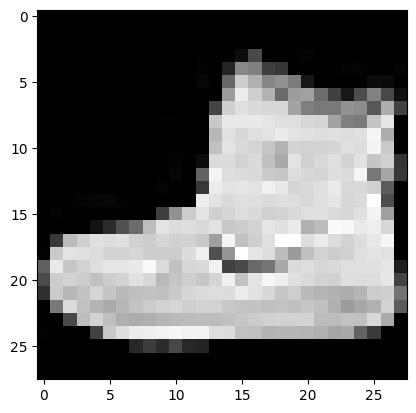

In [4]:
import matplotlib.pyplot as plt
plt.imshow(training_images[0], cmap='gray')
print(training_labels[0])

In [5]:
training_images = training_images / 255.0
test_images = test_images / 255.0

###Normalização da imagem

Dividir os valores dos pixels por **255** (normalização) converte a escala original de **0–255** para **0–1**. Isso é comum porque:

- **Melhora o treinamento**

  - Redes neurais convergem mais rápido com valores pequenos e padronizados.

  - Evita instabilidade numérica em cálculos de gradiente.

- **Compatibilidade**

  - Funções como sigmoid e softmax funcionam melhor com entradas entre 0 e 1.

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


###Explicação do modelo

"tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1))"

Esta camada Conv2D cria 64 filtros convolucionais de tamanho 3x3, que são inicializados aleatoriamente e ajustados durante o treinamento para extrair características das imagens.

Após a convolução, aplica-se "MaxPooling2D(2,2)" para:

- Reduzir dimensionalidade
- Manter apenas os valores mais importantes em janelas 2x2

###Repete novamente até chegar no "Flatten()"

No Flatten os dados que estão em 4 dimensões são achatados em apenas uma dimensão, onde são passados para as camadas Densas(Neuronios), passando por uma camada de 128 neuronios com ativação 'relu':

"tf.keras.layers.Dense(128,activation='relu')"

Após isso é passada pra a camada de saida de 10 neurônios, pois são 10 classes presentes no conjunto de dados

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


# Fluxo Completo da Rede Neural (Batch Size = 60.000)
# --------------------------------------------------

## 1. CAMADA DE ENTRADA
### Formato: (60000, 28, 28, 1)
### 60.000 imagens 28x28 pixels em tons de cinza (1 canal)

## 2. PRIMEIRA CAMADA CONVOLUCIONAL
Conv2D(filters=64, kernel_size=(3,3), activation='relu')
### Saída: (60000, 26, 26, 64)
### - Aplica 64 filtros de convolução 3x3
### - Cada imagem agora tem 64 mapas de características 26x26

## 3. PRIMEIRA CAMADA DE POOLING
MaxPooling2D(pool_size=(2,2))
### Saída: (60000, 13, 13, 64)
### - Reduz a dimensionalidade pela metade (máximo em janelas 2x2)

## 4. SEGUNDA CAMADA CONVOLUCIONAL
Conv2D(filters=64, kernel_size=(3,3), activation='relu')
### Saída: (60000, 11, 11, 64)
### - Aplica mais 64 filtros 3x3

## 5. SEGUNDA CAMADA DE POOLING
MaxPooling2D(pool_size=(2,2))
### Saída: (60000, 5, 5, 64)
### - Nova redução dimensional

## 6. CAMADA FLATTEN
Flatten()
### Saída: (60000, 1600)
### - Transforma em vetor 1D (5×5×64 = 1600 features por imagem)

## 7. CAMADA DENSA INTERMEDIÁRIA
Dense(units=128, activation='relu')
### Saída: (60000, 128)
### - Camada totalmente conectada com 128 neurônios

## 8. CAMADA DE SAÍDA
Dense(units=10, activation='softmax')
### Saída: (60000, 10)
### - 10 neurônios de saída (probabilidades para cada classe)

# RESUMO VISUAL DAS DIMENSÕES


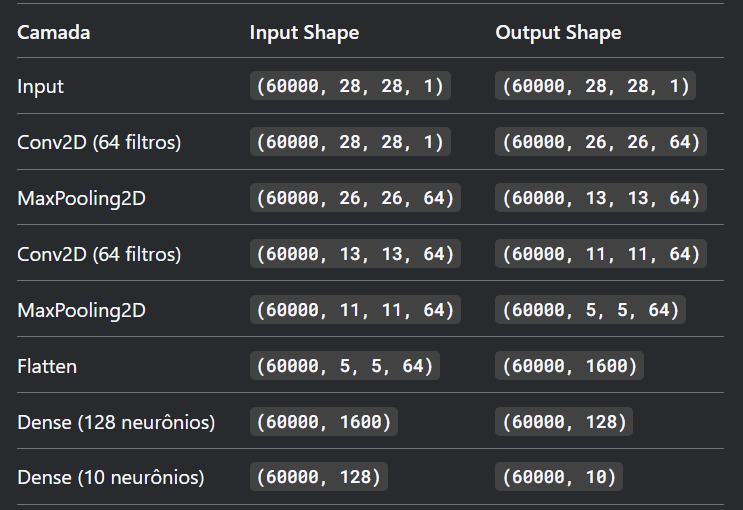

In [7]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [10]:
callbacks = myCallback()
model.fit(training_images,training_labels,epochs=50,callbacks=[callbacks])
'''
Rodou 9 épocas para chegar nessa acurácia, como estou rodando denovo ele parou na priemira época
'''

Epoch 1/50
1871/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9747 - loss: 0.0656
Reached 97% accuracy so cancelling training!
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9747 - loss: 0.0656


In [11]:
model.evaluate(test_images,test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9109 - loss: 0.3916


[0.37700602412223816, 0.9093999862670898]